In [8]:
%reload_kedro
X_train =  io.load('stand_log_X_train')
X_test =  io.load('stand_log_X_test')
X_valid =  io.load('stand_log_X_valid')
y_train = io.load('y_train')

2019-07-02 15:45:29,171 - INFO - ** Kedro project Twitter Network
2019-07-02 15:45:29,174 - INFO - Loading: /Users/tomduke/Documents/Academic/MBusA/Modules/M3 - Advanced Analytics/Machine Learning/twitter-network/conf/base/logging.yml
2019-07-02 15:45:29,186 - INFO - Loading: /Users/tomduke/Documents/Academic/MBusA/Modules/M3 - Advanced Analytics/Machine Learning/twitter-network/conf/base/catalog.yml
2019-07-02 15:45:29,223 - INFO - Loading: /Users/tomduke/Documents/Academic/MBusA/Modules/M3 - Advanced Analytics/Machine Learning/twitter-network/conf/base/credentials.yml
2019-07-02 15:45:29,228 - INFO - Loading: /Users/tomduke/Documents/Academic/MBusA/Modules/M3 - Advanced Analytics/Machine Learning/twitter-network/conf/base/parameters.yml
2019-07-02 15:45:29,259 - INFO - Defined global variables proj_dir, proj_name, conf and io
2019-07-02 15:45:29,260 - INFO - Loading data from `stand_log_X_train` (PickleLocalDataSet)...
2019-07-02 15:45:29,616 - INFO - Loading data from `stand_log_X_t

In [4]:
X_train.shape

(693510, 46)

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def corr_plot(df, sort = False, skew = False):
    fg_color = 'white'

    f = plt.figure(figsize=(19, 15))
    cor = df.corr().abs()
    columns = cor.columns
    if sort:
        cor = cor.sort_values("label", ascending = False)
        cor = cor[list(cor.index)]
    plt.matshow(cor, fignum=f.number)
    plt.xticks(range(df.shape[1]), cor.columns, fontsize=14, rotation=90, color = fg_color)
    plt.yticks(range(df.shape[1]), cor.columns, fontsize=14, color = fg_color)

    cb = plt.colorbar()
    cb.set_label('', color=fg_color)
    cb.ax.yaxis.set_tick_params(color=fg_color)
    cb.outline.set_edgecolor(fg_color)

    plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=fg_color)

    cb.ax.tick_params(labelsize=14)

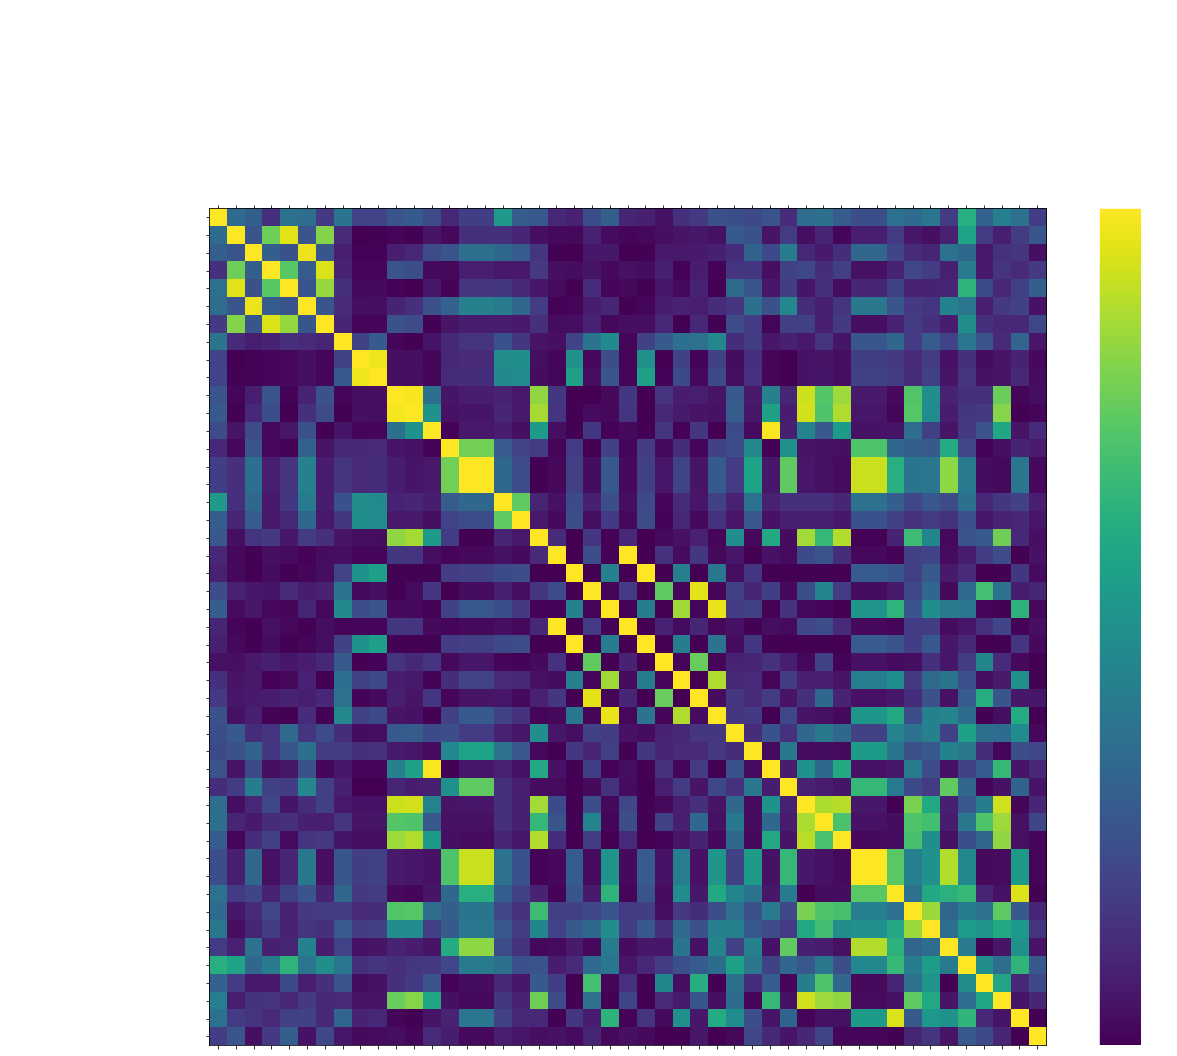

In [32]:
df = X_train
df["label"] = np.array(y_train[:len(X_train)])
corr_plot(df)

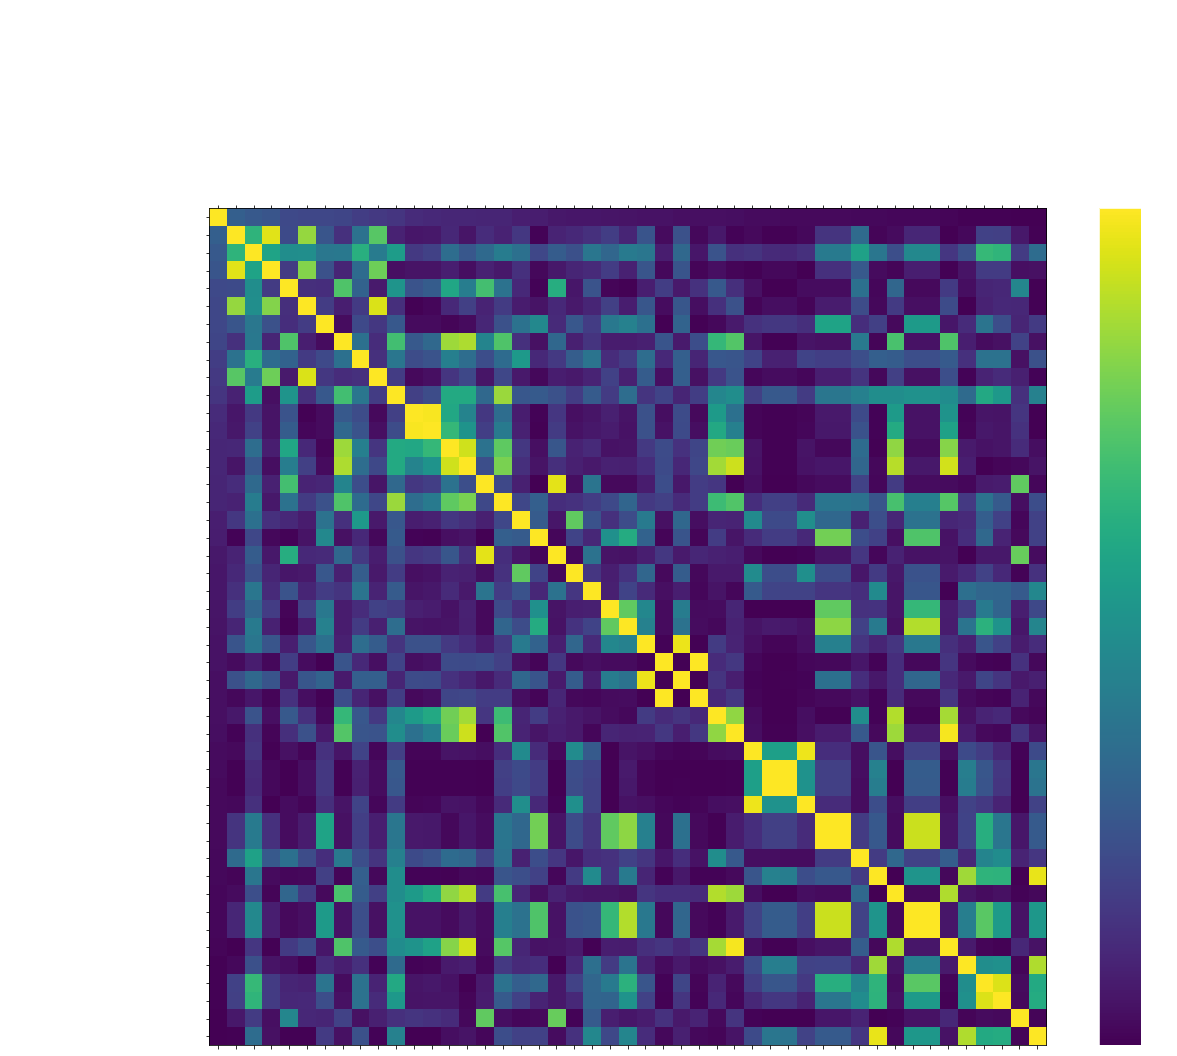

In [12]:
corr_plot(df, sort = True)

In [23]:
list(df.corr().sort_values("label", ascending = False).label.head(n = 25).index

label                     1.000000
cos_predecessors          0.302185
log_shared_neighbors      0.278684
jc_predecessors           0.264042
log_source_in_degree      0.222520
cos_neighbors             0.213621
is_followed_back          0.212424
log_source_neighbors      0.208056
transitive_links          0.182595
jc_neighbors              0.165537
log_total_neighbors       0.152802
log_source_bi_degree      0.107761
log_source_out_degree     0.106563
source_in_centrality      0.103782
log_node_boundary_size    0.103553
adjusted_adamic_adar      0.083588
source_katz               0.065842
resource_allocation       0.060728
pa_predecessors           0.059198
cos_successors            0.050823
source_centrality         0.048362
jc_successors             0.042943
source_out_centrality     0.042795
shortest_path             0.040714
pa_neighbors              0.028974
Name: label, dtype: float64

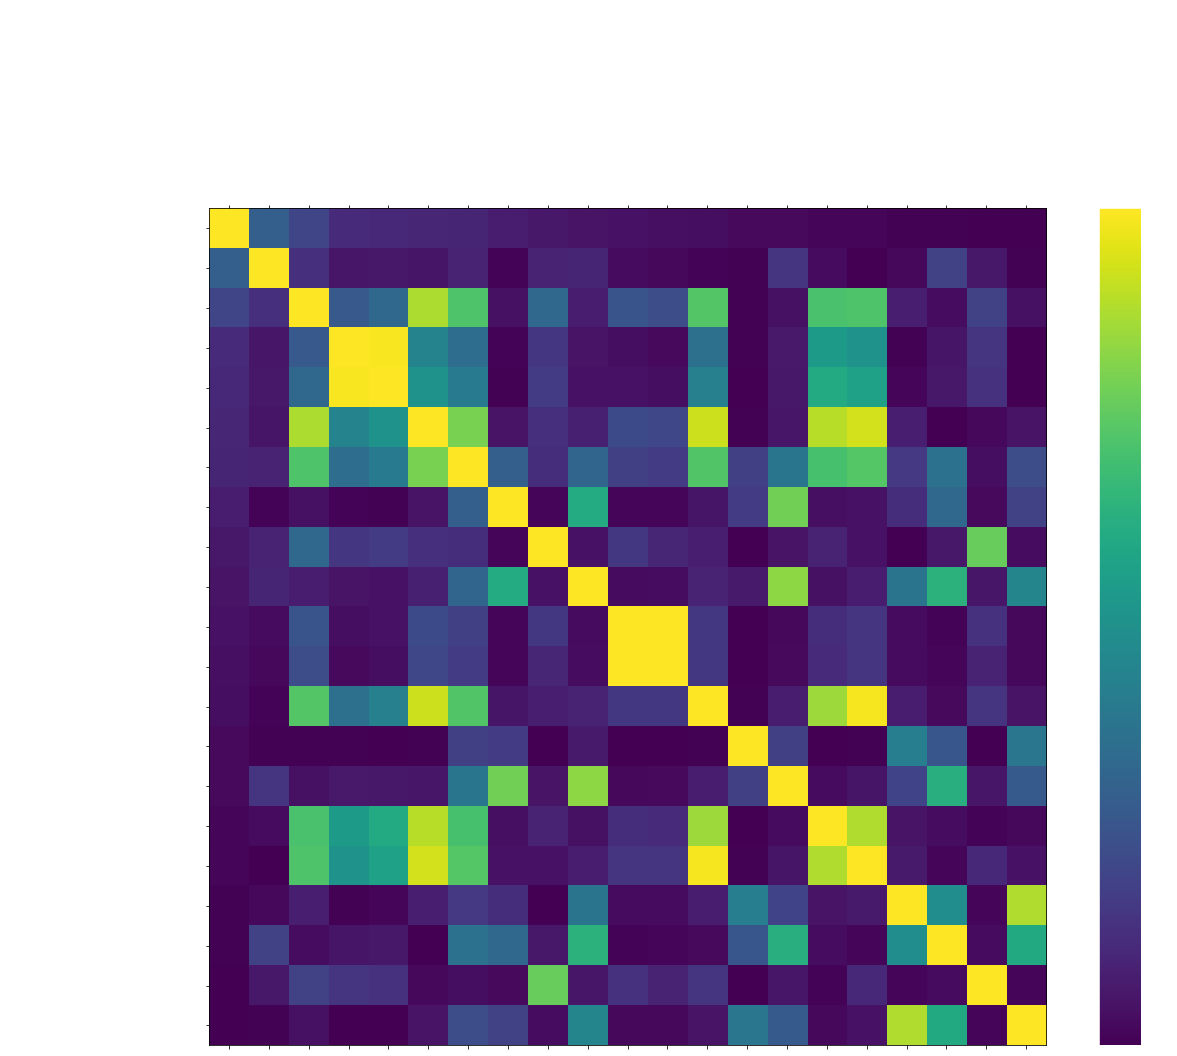

In [13]:
features = ['cos_predecessors', 'source_in_density', 'source_out_density', 'source_bi_density', 'sink_in_density', 'sink_out_density', 'source_centrality', 'sink_centrality', 'source_out_centrality', 'source_page_rank', 'sink_page_rank', 'source_katz', 'sink_katz', 'source_reciprocity', 'log_source_out_degree', 'log_source_neighbors', 'log_source_avg_nbr_degree', 'log_sink_neighbors', 'log_node_boundary_size', 'log_sink_avg_nbr_degree'] 
df2 = df[features + ['label']]
corr_plot(df2, sort = True)